In [1]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import emcee
import corner

In [2]:
sol_rad = 6.957e10 #cm
c = 299792458 * 100 #cm/s
parsec = 3.08568e18 #cm
jansky = 1e-23

In [3]:
sampler = emcee.backends.HDFBackend("data/mcmc_agEt.h5", read_only=True)
# flat_samples = sampler.get_chain(flat=True)
ndim=4

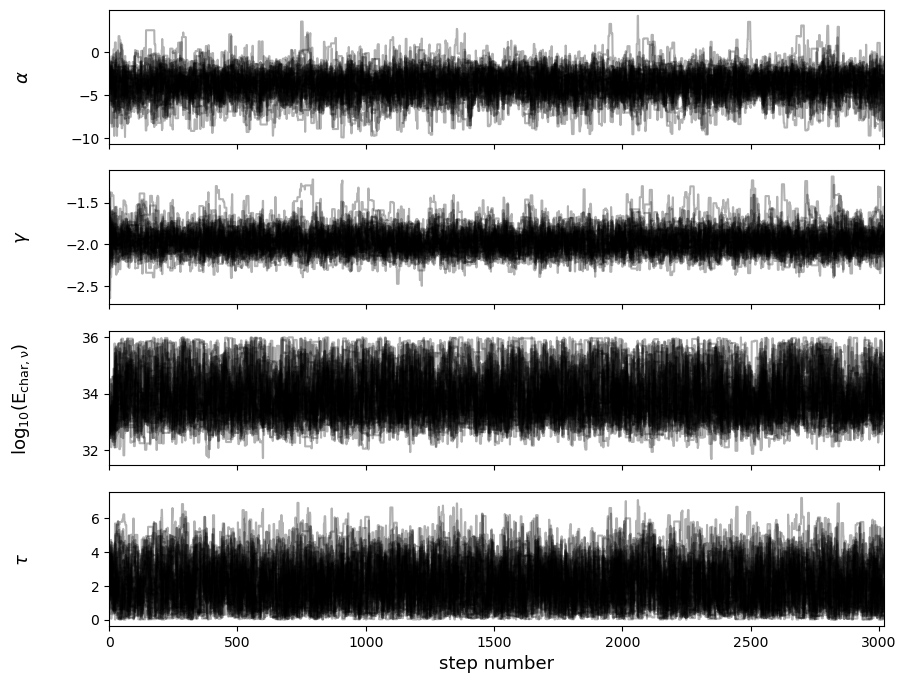

In [4]:
fig, axes = plt.subplots(4, figsize=(10, 8), sharex=True)
samples = sampler.get_chain()
labels = [r"$\alpha$", r"$\gamma$", r"log$_{10}$(E$_{\rm char, \nu}$)", r"$\tau$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], fontsize=13)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number", fontsize=13);

In [5]:
tau = sampler.get_autocorr_time()
print(tau)
print(np.sum(tau))
# print(np.mean(sampler.acceptance_fraction), np.std(sampler.acceptance_fraction))
acceptance_fraction = sampler.accepted / sampler.iteration
print(np.mean(acceptance_fraction), np.std(acceptance_fraction))

[21.06100323 22.77922468 25.93782025 23.04279692]
92.82084508129277
0.22252690397350994 0.00917511532709316


(93440, 4)


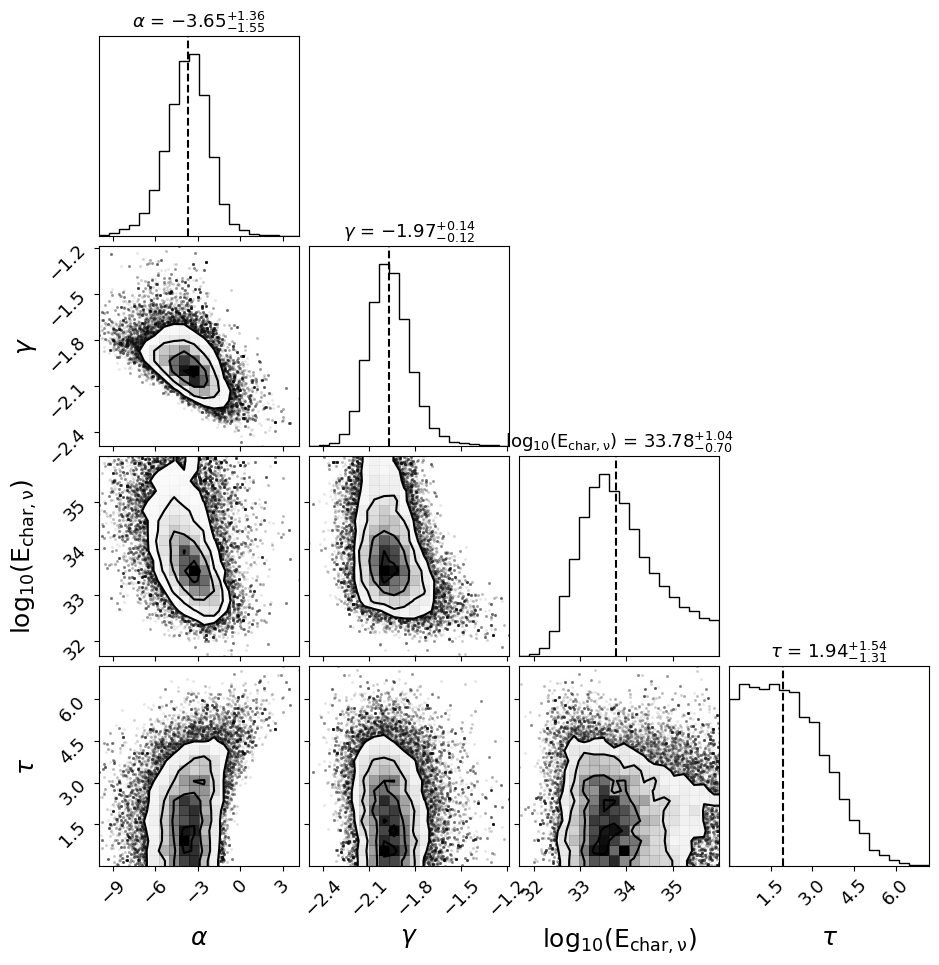

In [6]:
flat_samples = sampler.get_chain(discard=100, flat=True)
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, show_titles=True, title_kwargs={'fontsize':13}, label_kwargs={'fontsize':18}, quantiles=[0.5]
);
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=13)